In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pyplot

In [42]:
iris = pd.read_csv("iris.csv")

In [43]:
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


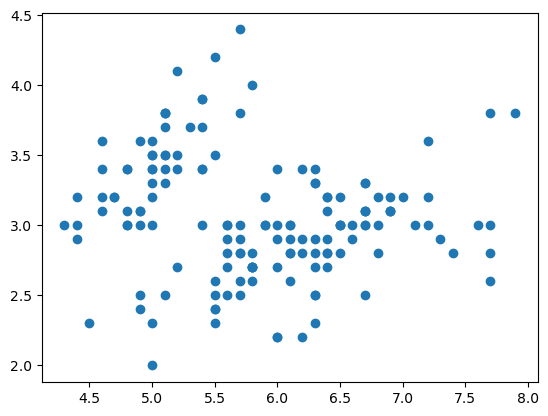

In [44]:
plt.scatter(iris["sepal.length"], iris["sepal.width"])

# pas de titre, pas d'axe, pas de couleurs selon variétés...

# Seaborn

## À garder en tête
### Format d'appel
* sns.fonction(data, x, y, hue="", size=, style)
* sns.catplot(titanic, x="pclass", y="age", hue="sex")

### Fonctions 
* pairplot
* caplot
* boxplot
* ~~distplot~~ => histplot
* jointplot
* heatmap

![Alt text](seaborn_vs_matplotlib.png)

c:\Users\phili\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


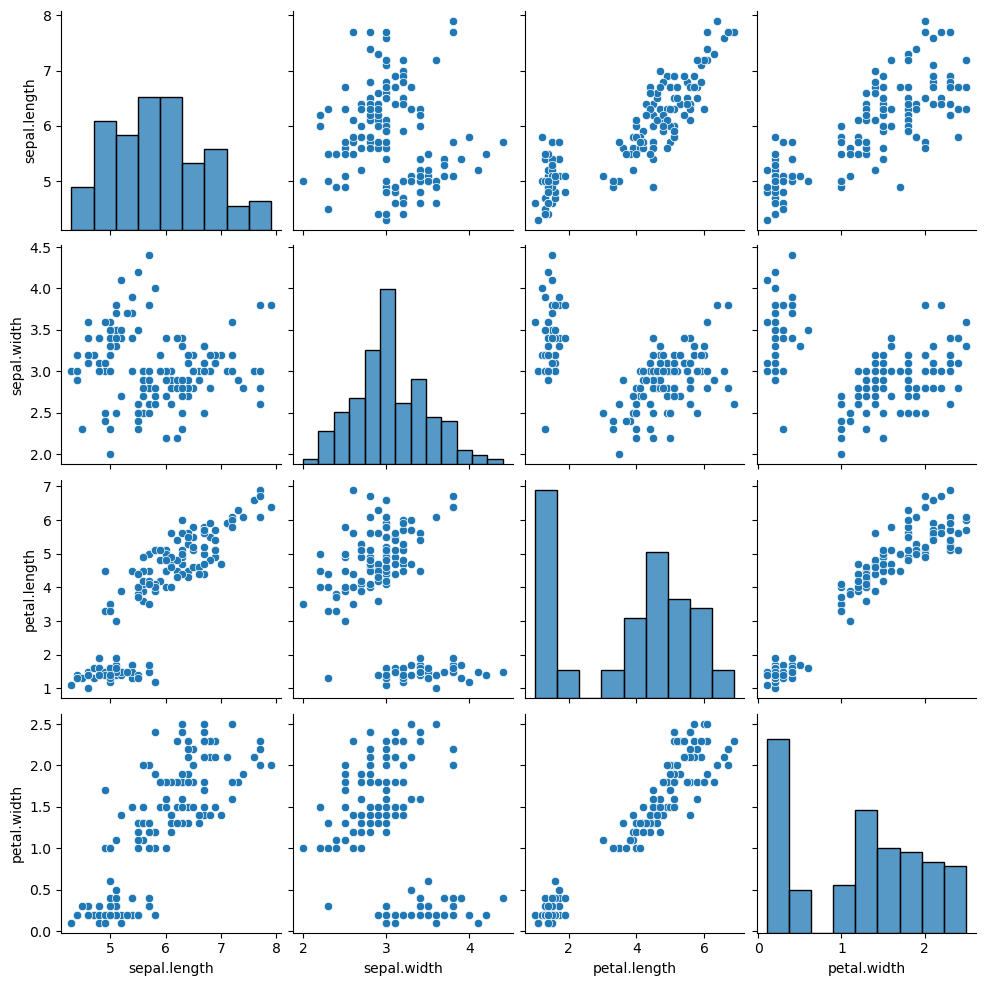

In [45]:
sns.pairplot(iris)

c:\Users\phili\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


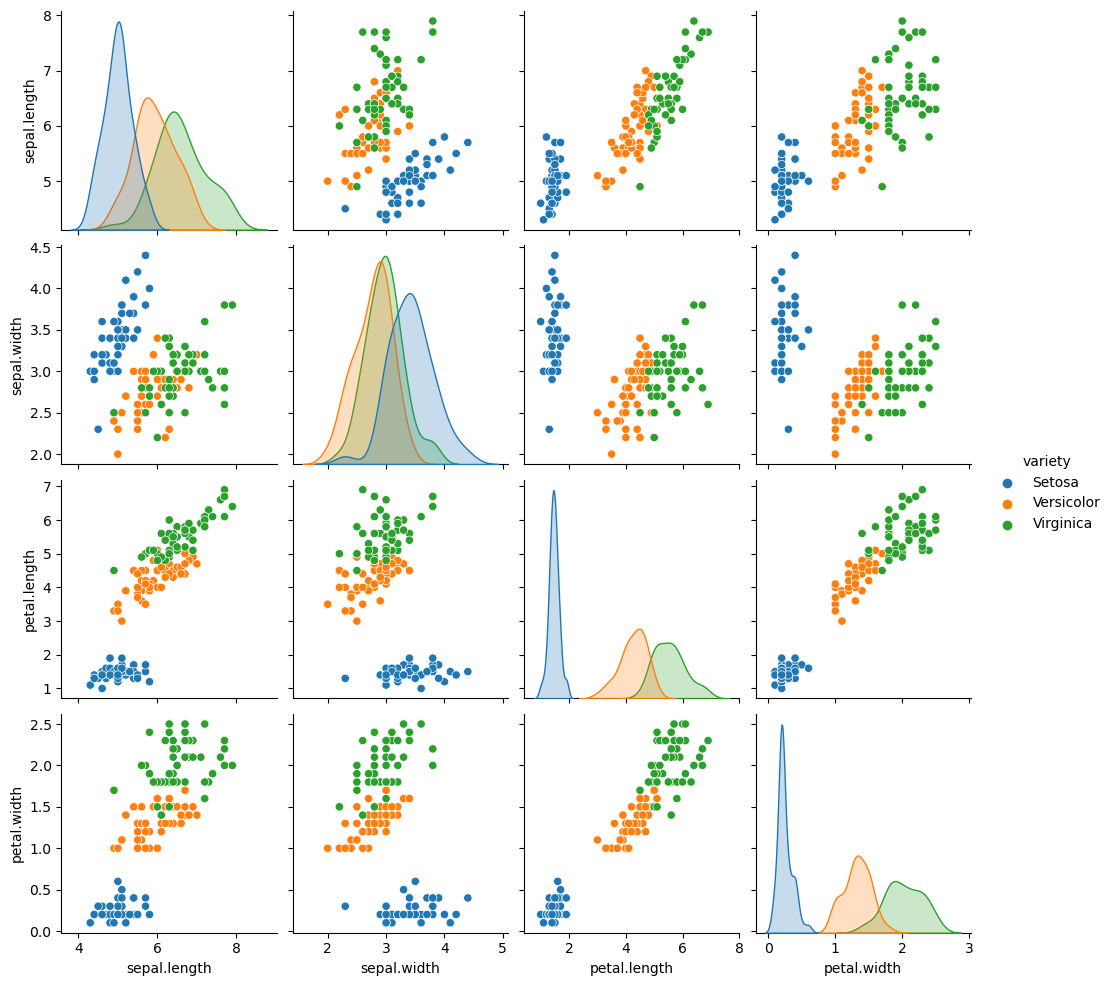

In [46]:
sns.pairplot(iris, hue="variety")

In [47]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [48]:
titanic.drop(["alone", "alive", "who", "adult_male", "embark_town", "class"], axis=1, inplace=True)
titanic.dropna(axis=0, inplace=True)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
1,1,1,female,38.0,1,0,71.2833,C,C
3,1,1,female,35.0,1,0,53.1000,S,C
6,0,1,male,54.0,0,0,51.8625,S,E
10,1,3,female,4.0,1,1,16.7000,S,G
11,1,1,female,58.0,0,0,26.5500,S,C


c:\Users\phili\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


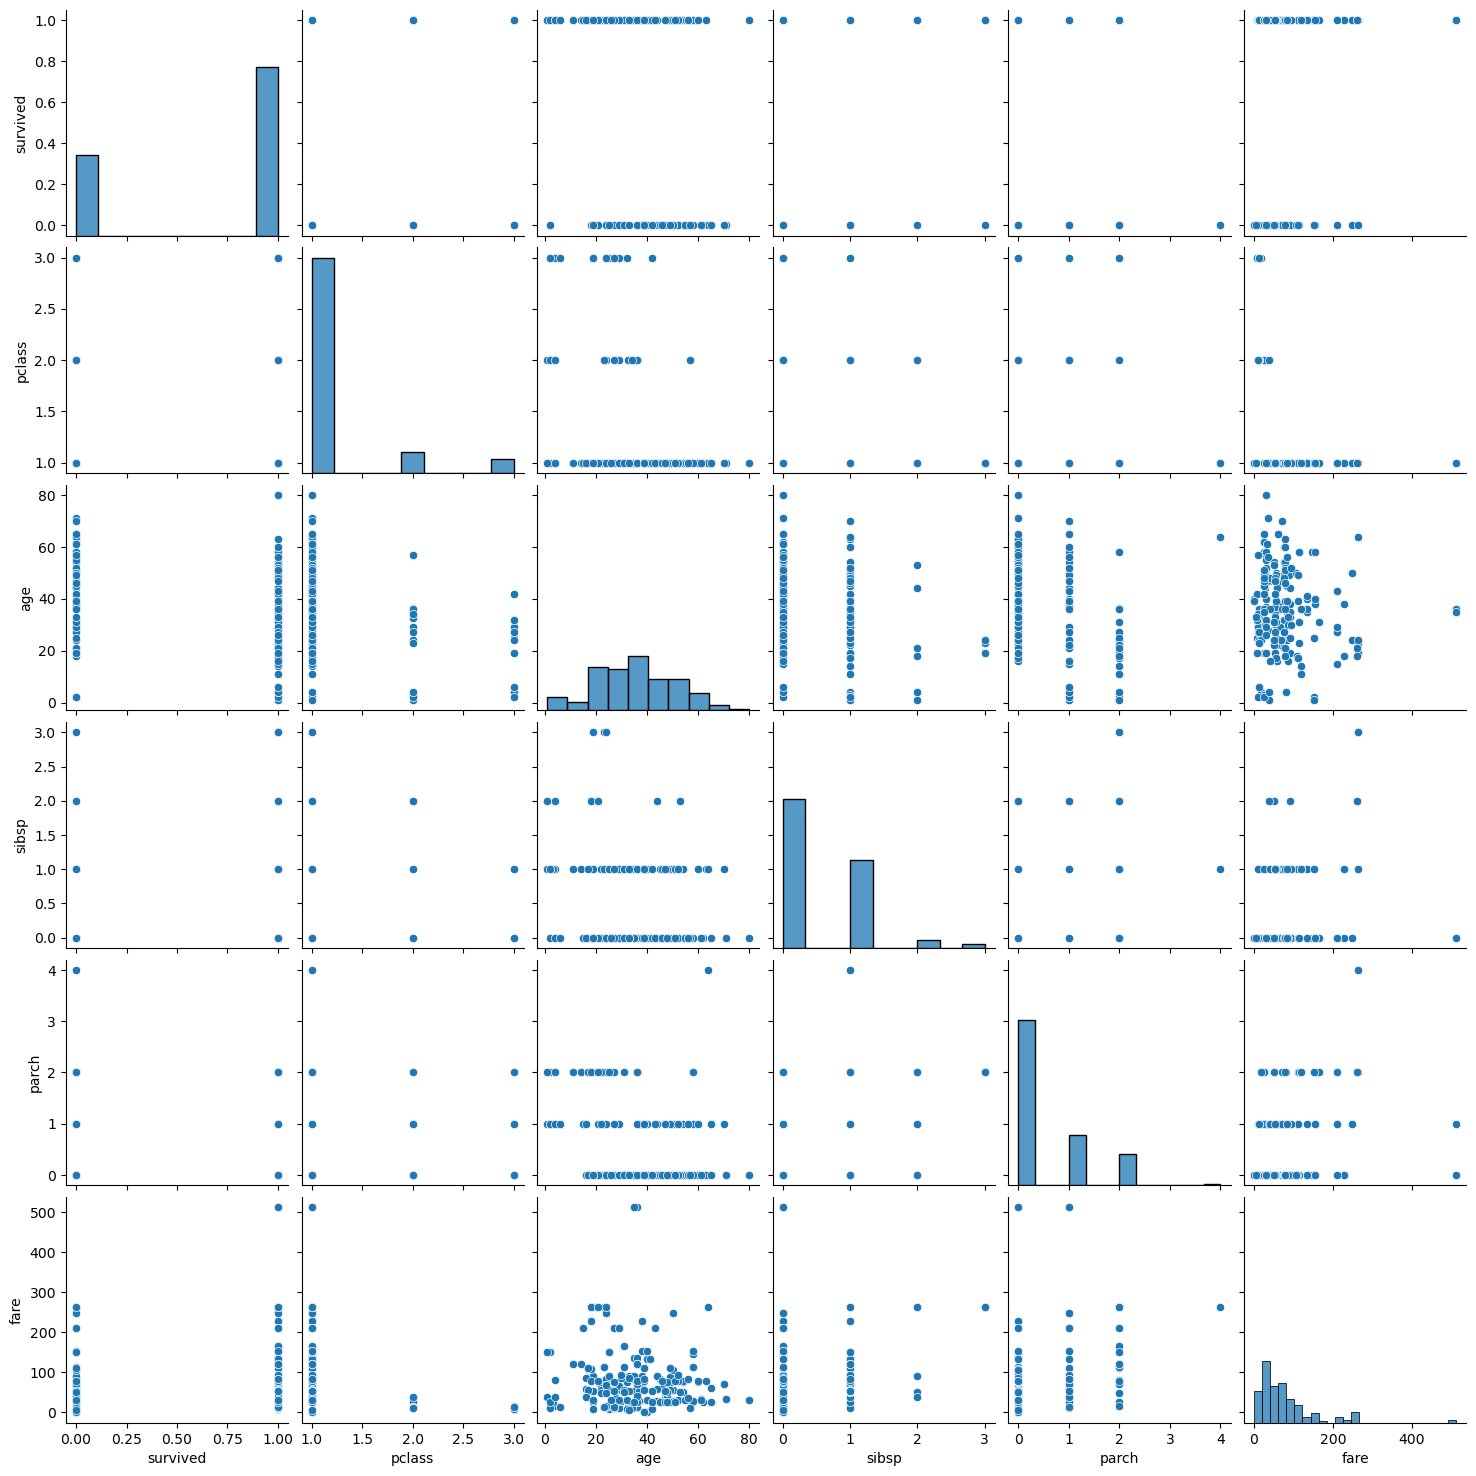

In [49]:
sns.pairplot(titanic)

# l'affichage est moche car on a beaucoup de catégorie et pas des valeurs
# d'où les fonctions Categorical Plots

# Catégories

c:\Users\phili\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


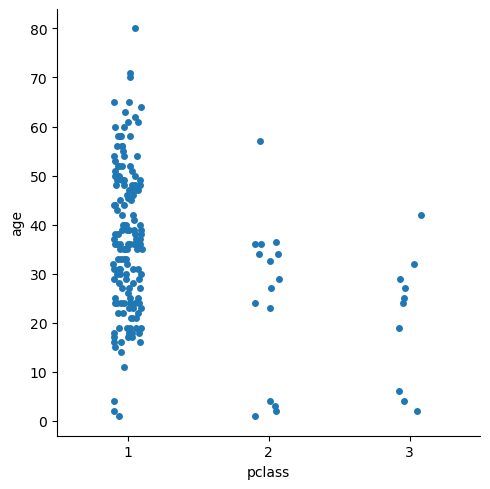

In [50]:
sns.catplot(titanic, x="pclass", y="age")

c:\Users\phili\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


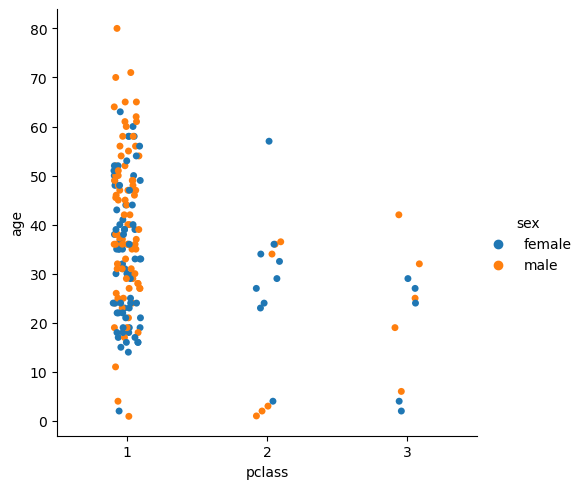

In [51]:
# différencier avec le sex
sns.catplot(titanic, x="pclass", y="age", hue="sex")

# Boites à moustache

<Axes: xlabel='pclass', ylabel='age'>

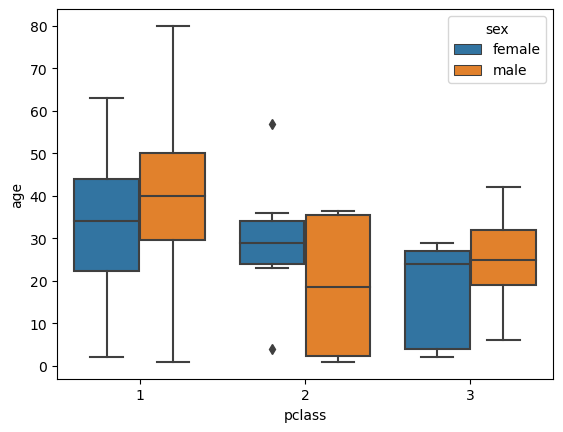

In [52]:
# rien à changer pour utiliser des box
sns.boxplot(titanic, x="pclass", y="age", hue="sex")


![Alt text](boxplot.png)

# Distribution

C:\Users\phili\AppData\Local\Temp\ipykernel_4192\883978473.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic["fare"]) # attention y a un T. disTplot


<Axes: xlabel='fare', ylabel='Density'>

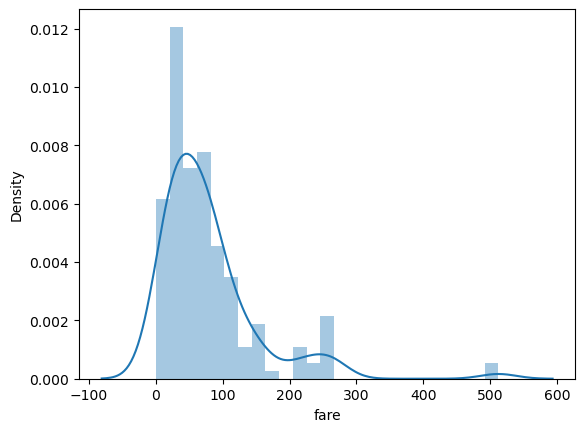

In [53]:
# visualiser la distribution de la variable tarif
sns.distplot(titanic["fare"]) # attention y a un T. disTplot

<Axes: xlabel='fare', ylabel='Count'>

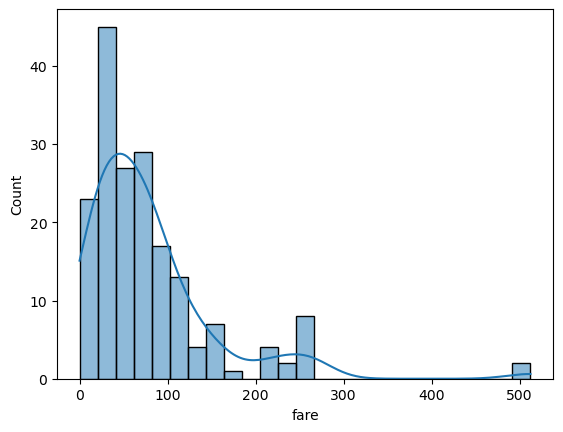

In [54]:
# Comment mimer `distplot` qui est deprecated
sns.histplot(titanic["fare"], kde=True) # attention en Y on a le count et pas le %

<Axes: xlabel='fare', ylabel='Density'>

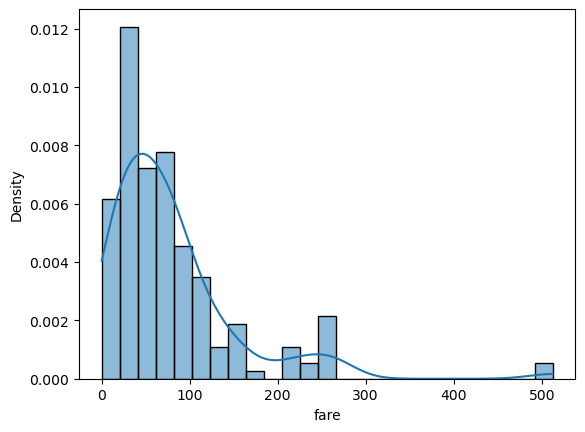

In [55]:
sns.histplot(titanic["fare"], kde=True, stat="density") 

<Axes: xlabel='fare', ylabel='Density'>

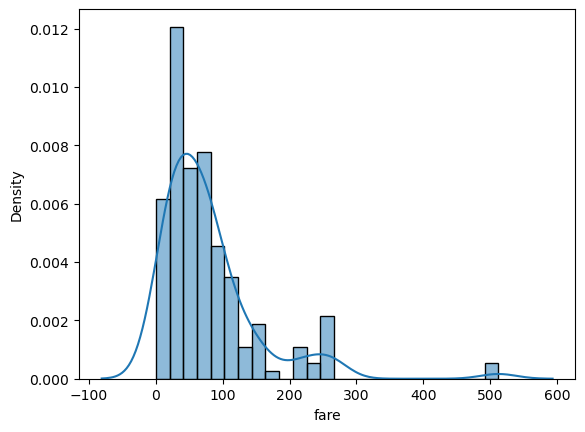

In [56]:
sns.histplot(titanic["fare"], kde=True, stat="density", kde_kws=dict(cut=3)) 

<Axes: xlabel='fare', ylabel='Density'>

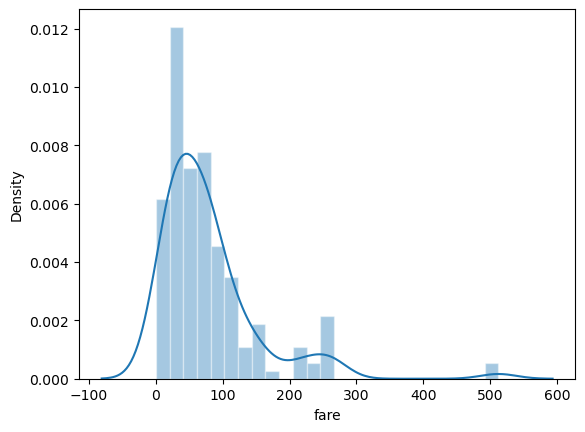

In [57]:
sns.histplot(titanic["fare"], kde=True, stat="density", kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4)) 

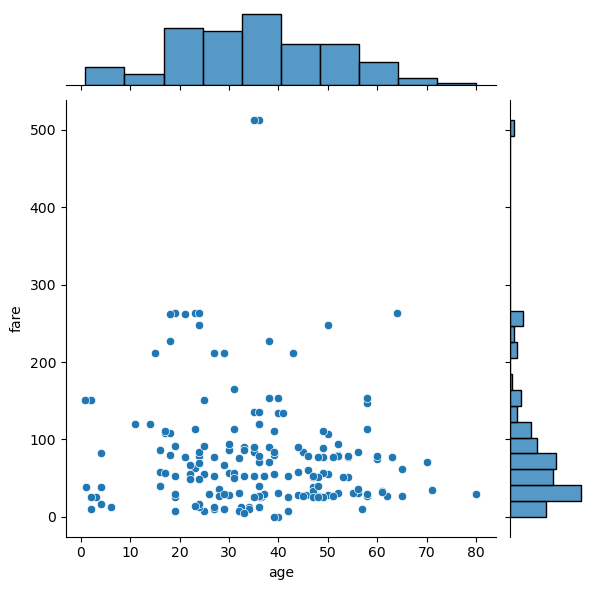

In [58]:
sns.jointplot(titanic, x="age", y="fare")

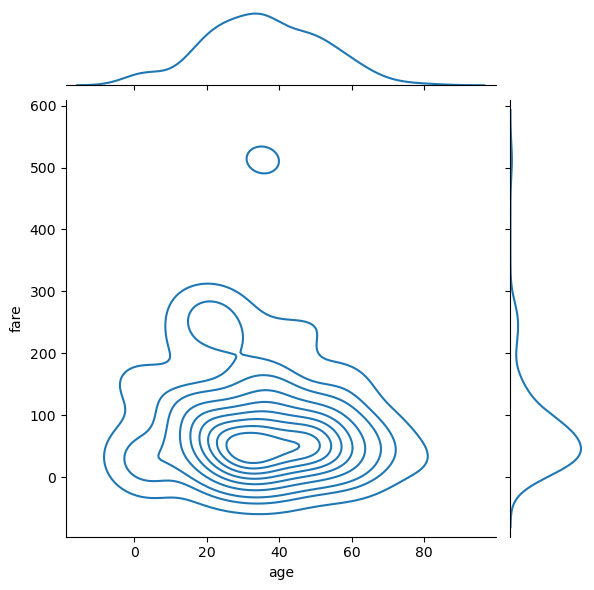

In [59]:
sns.jointplot(titanic, x="age", y="fare", kind="kde") # kde = kernel density

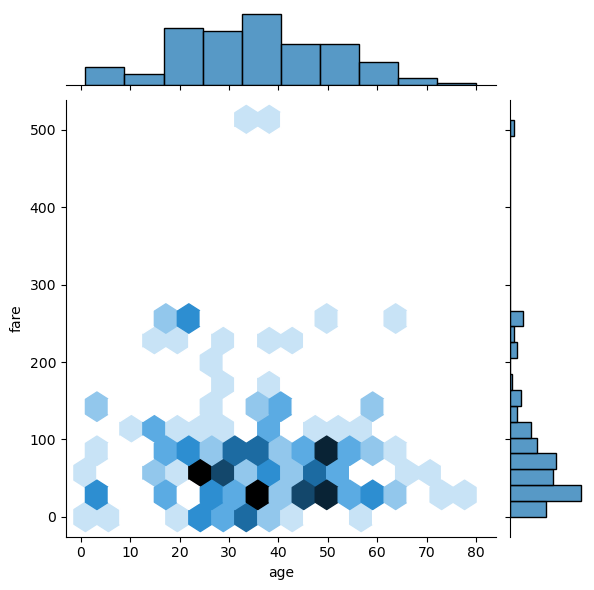

In [60]:
sns.jointplot(titanic, x="age", y="fare", kind="hex")

# Visualiser une matrice de correlation

In [61]:
titanic.drop(["sex","embarked", "deck"], axis=1, inplace=True)
titanic.dropna(axis=0, inplace=True)
titanic.head()


,survived,pclass,age,sibsp,parch,fare
1,1,1,38.0,1,0,71.2833
3,1,1,35.0,1,0,53.1000
6,0,1,54.0,0,0,51.8625
10,1,3,4.0,1,1,16.7000
11,1,1,58.0,0,0,26.5500


<Axes: >

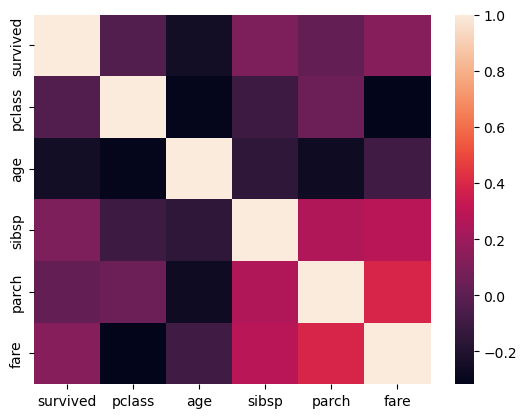

In [62]:
sns.heatmap(titanic.corr())